Number of samples: 10
Estimated value of Pi is 2.8
Absolute error is 0.3415926535897933
Time taken is 0.734978437423706 seconds
RAM usage: 26.10%
CPU usage: 6.40%


Number of samples: 1000
Estimated value of Pi is 3.172
Absolute error is 0.030407346410207037
Time taken is 0.2070753574371338 seconds
RAM usage: 26.30%
CPU usage: 81.50%


Number of samples: 10000
Estimated value of Pi is 3.162
Absolute error is 0.020407346410206806
Time taken is 0.19519639015197754 seconds
RAM usage: 26.40%
CPU usage: 82.10%


Number of samples: 100000
Estimated value of Pi is 3.13924
Absolute error is 0.0023526535897930856
Time taken is 0.1765899658203125 seconds
RAM usage: 26.40%
CPU usage: 90.50%


Number of samples: 1000000
Estimated value of Pi is 3.142336
Absolute error is 0.00074334641020668
Time taken is 0.22981572151184082 seconds
RAM usage: 26.40%
CPU usage: 93.10%


Number of samples: 10000000
Estimated value of Pi is 3.141742
Absolute error is 0.0001493464102066966
Time taken is 0.709995508193

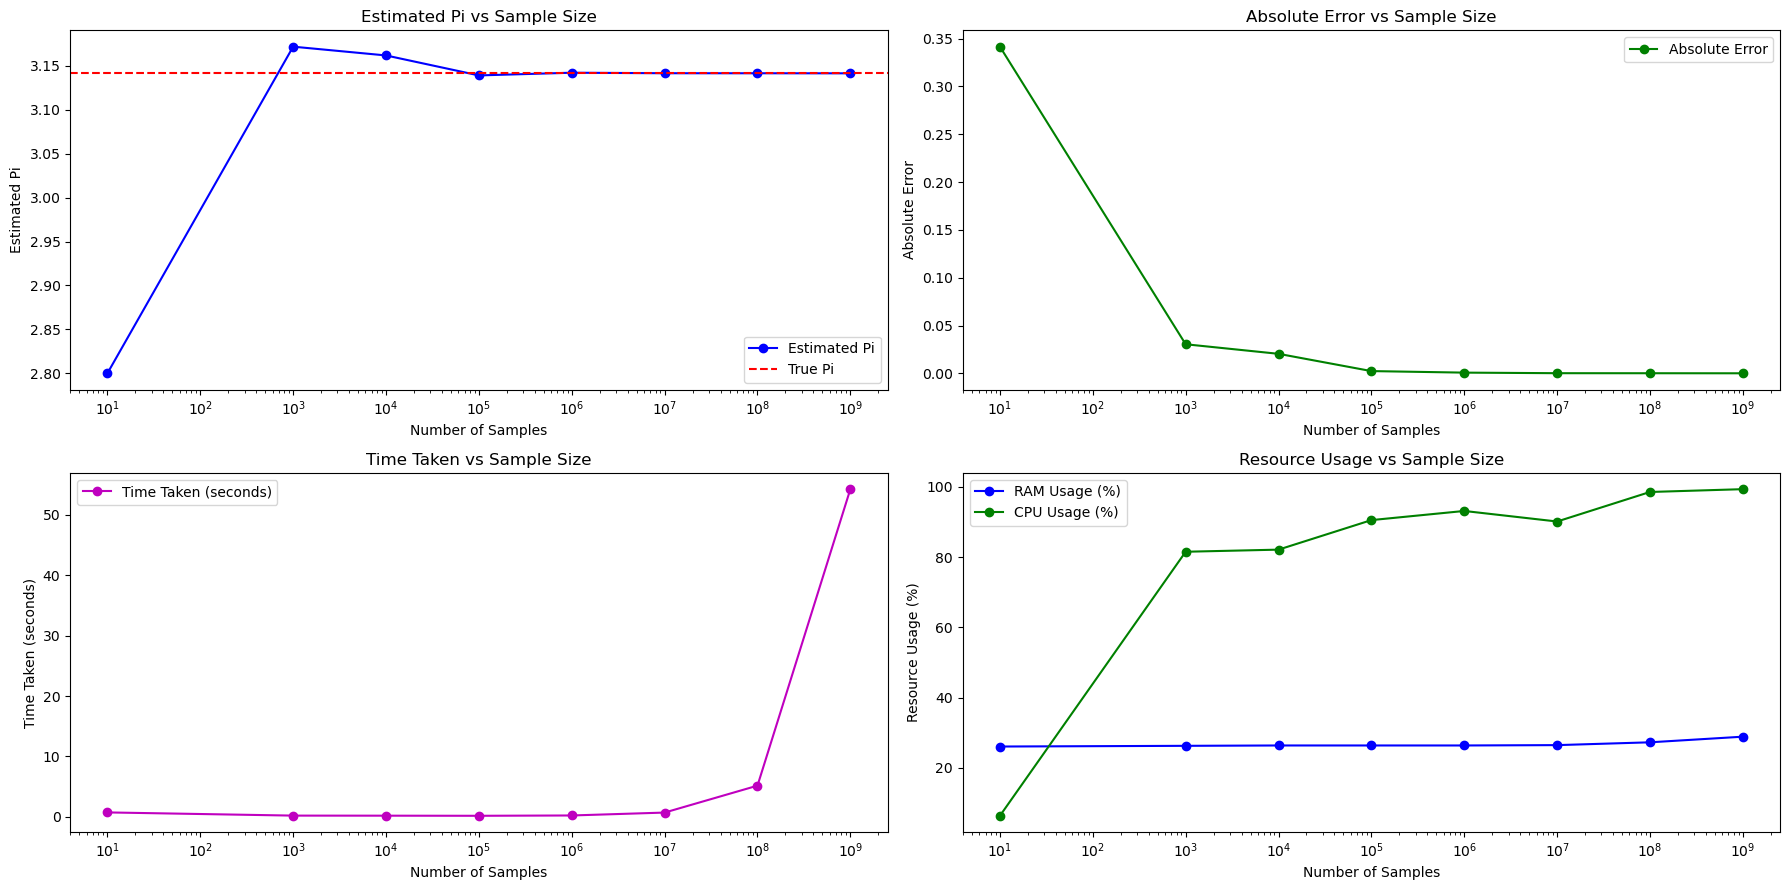

In [10]:
from pyspark import SparkContext, SparkConf
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

def is_point_inside_unit_circle(p):
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

if __name__ == "__main__":
    # Stop any existing SparkContext
    try:
        sc.stop()
    except:
        pass

    # Initialize Spark Context with increased resources
    conf = SparkConf().setAppName("MonteCarloSimulation").set("spark.executor.memory", "4g").set("spark.executor.cores", "2")
    sc = SparkContext(conf=conf)

    # List of different numbers of samples
    sample_sizes = [10, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

    # Lists to store results
    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []
    print("========PYSPARK========")
    # Iterate over different sample sizes
    for num_samples in sample_sizes:
        # Start timing
        start_time = time.time()

        # Distribute the samples across the cluster
        samples = sc.parallelize(range(0, num_samples))

        # Perform the Monte Carlo simulation
        count = samples.filter(is_point_inside_unit_circle).count()

        # Estimate Pi
        pi_estimate = 4 * count / num_samples
        pi_estimates.append(pi_estimate)

        # Known value of Pi
        true_pi = math.pi

        # Calculate the absolute error
        absolute_error = abs(pi_estimate - true_pi)
        absolute_errors.append(absolute_error)

        # End timing
        end_time = time.time()

        # Calculate the time taken
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {pi_estimate}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Stop the Spark Context
    sc.stop()

    # Plotting results
    plt.figure(figsize=(18, 9))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g',label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m',label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


importing random on engine(s)
importing math on engine(s)
importing time on engine(s)
importing matplotlib.pyplot on engine(s)
importing psutil on engine(s)
Number of samples: 10
Estimated value of Pi is 3.2
Absolute error is 0.05840734641020706
Time taken is 0.009933710098266602 seconds
RAM usage: 24.90%
CPU usage: 5.40%


Number of samples: 1000
Estimated value of Pi is 3.172
Absolute error is 0.030407346410207037
Time taken is 0.008671998977661133 seconds
RAM usage: 24.90%
CPU usage: 45.50%


Number of samples: 10000
Estimated value of Pi is 3.1384
Absolute error is 0.0031926535897932595
Time taken is 0.011491775512695312 seconds
RAM usage: 24.90%
CPU usage: 28.60%


Number of samples: 100000
Estimated value of Pi is 3.14296
Absolute error is 0.00136734641020686
Time taken is 0.023682355880737305 seconds
RAM usage: 24.90%
CPU usage: 39.30%


Number of samples: 1000000
Estimated value of Pi is 3.139356
Absolute error is 0.0022366535897933026
Time taken is 0.10782694816589355 seconds


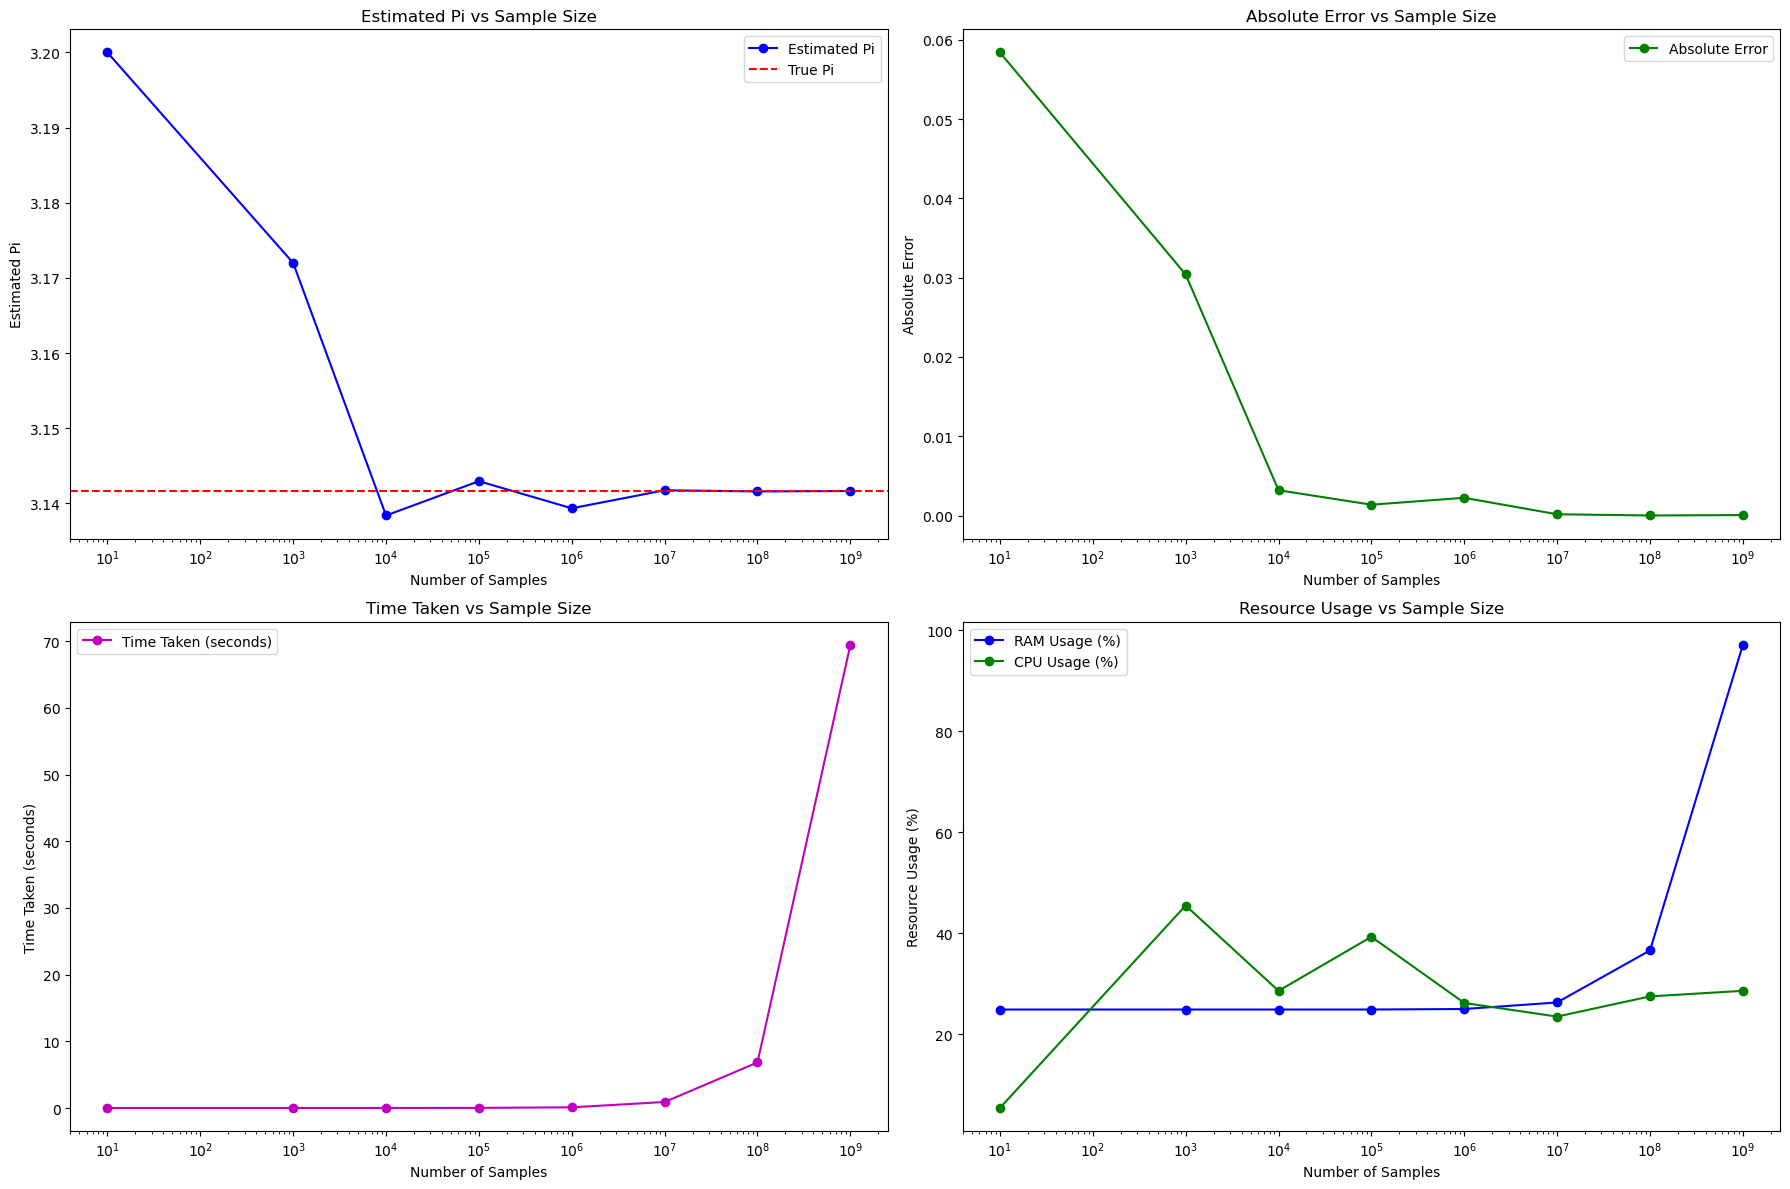

In [11]:
#ipcluster start -n 4
import ipyparallel as ipp
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Function to check if a point is inside the unit circle
def is_point_inside_unit_circle(p):
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

if __name__ == "__main__":
    # Connect to the IPython Parallel cluster
    c = ipp.Client()

    # Number of engines (workers)
    num_engines = len(c)

    # Execute imports on all engines
    with c[:].sync_imports():
        import random
        import math
        import time
        import matplotlib.pyplot as plt
        import psutil

    # List of different numbers of samples
    sample_sizes = [10, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

    # Lists to store results
    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    # Parallel execution using IPython Parallel
    dview = c[:]
    
    print("========IPYPARALLEL========")
    # Iterate over different sample sizes
    for num_samples in sample_sizes:
        # Start timing
        start_time = time.time()

        # Perform the Monte Carlo simulation using IPython Parallel
        count = sum(dview.map_sync(is_point_inside_unit_circle, range(num_samples)))

        # Estimate Pi
        pi_estimate = 4 * count / num_samples
        pi_estimates.append(pi_estimate)

        # Known value of Pi
        true_pi = math.pi

        # Calculate the absolute error
        absolute_error = abs(pi_estimate - true_pi)
        absolute_errors.append(absolute_error)

        # End timing
        end_time = time.time()

        # Calculate the time taken
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {pi_estimate}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


Number of samples: 10
Estimated value of Pi is 2.8
Absolute error is 0.3415926535897933
Time taken is 0.023731708526611328 seconds
RAM usage: 29.70%
CPU usage: 9.00%


Number of samples: 1000
Estimated value of Pi is 3.1
Absolute error is 0.04159265358979303
Time taken is 0.030379533767700195 seconds
RAM usage: 29.70%
CPU usage: 14.30%


Number of samples: 10000
Estimated value of Pi is 3.104
Absolute error is 0.037592653589793024
Time taken is 0.034954071044921875 seconds
RAM usage: 29.70%
CPU usage: 20.00%




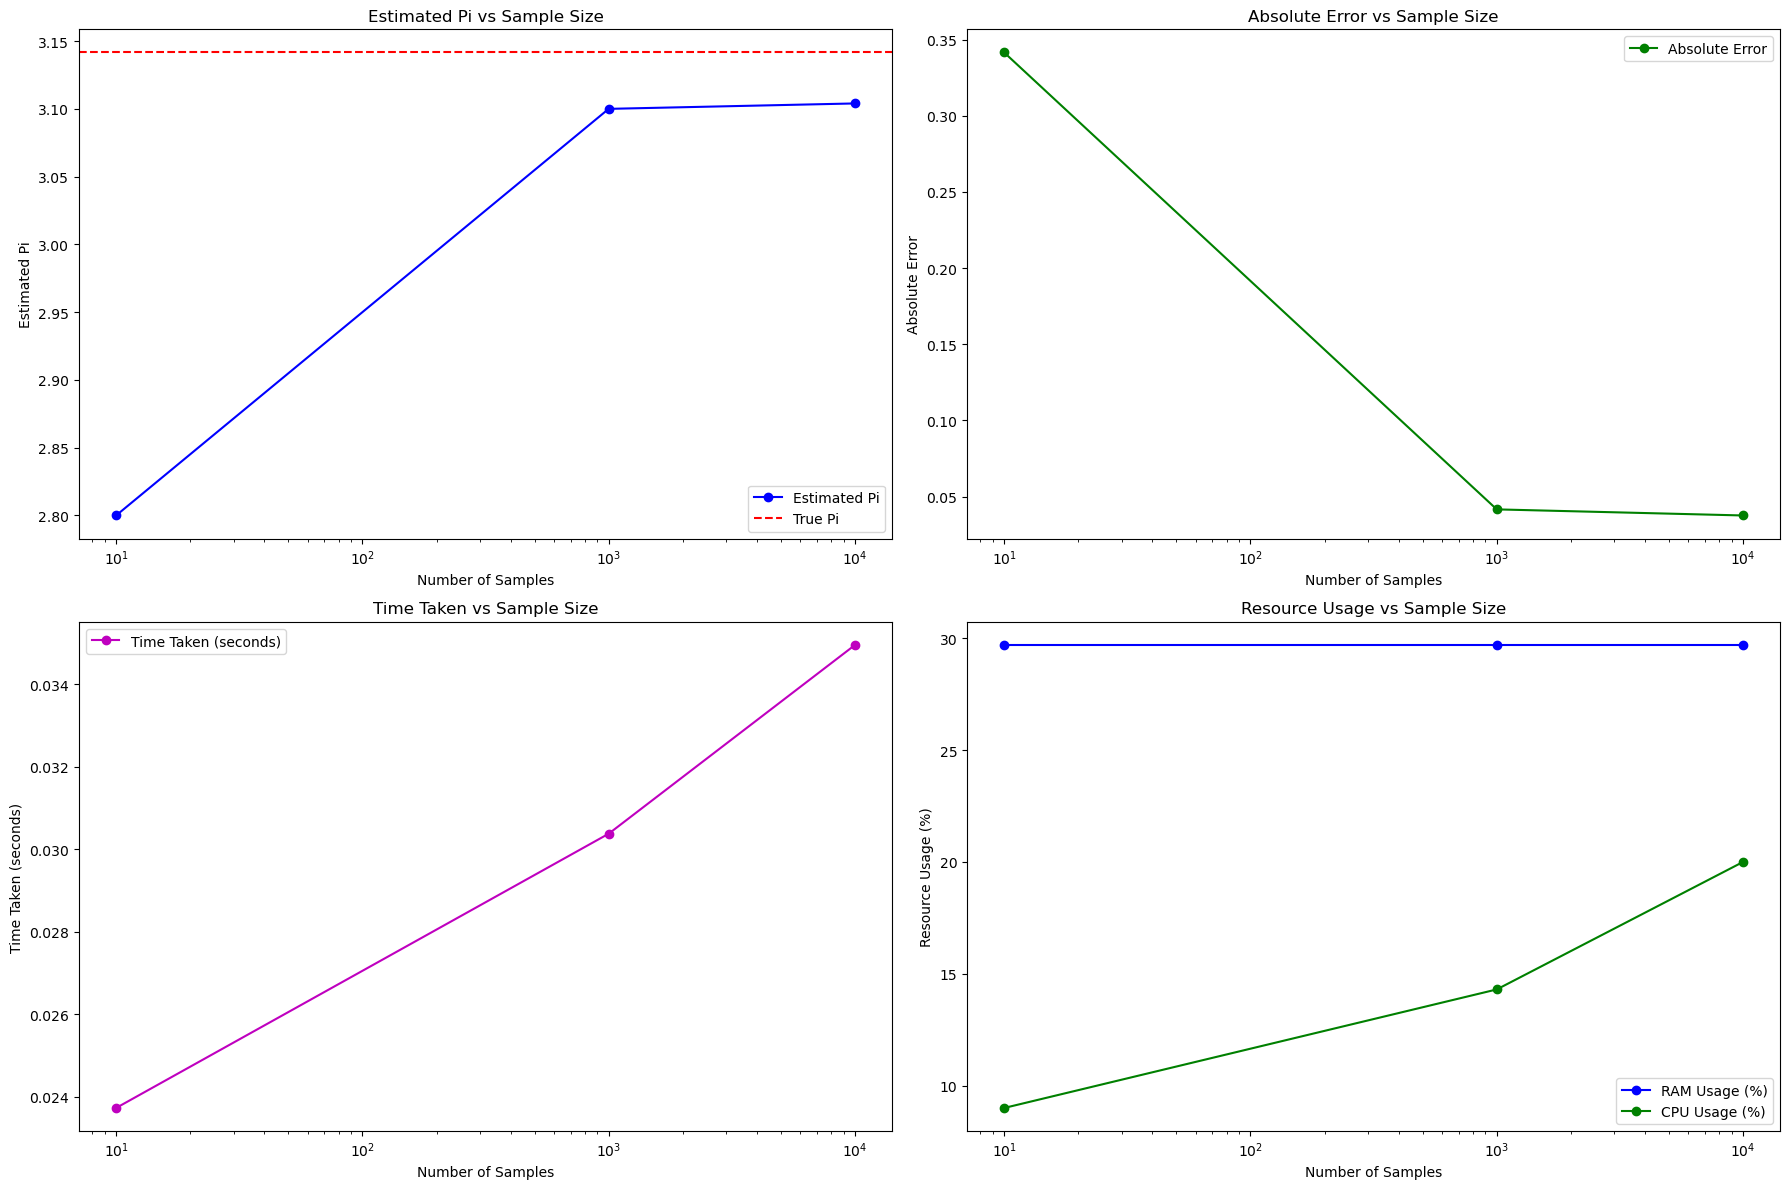

In [3]:
import dask
from dask.distributed import Client, as_completed
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    def is_point_inside_unit_circle(_):
        x, y = random.random(), random.random()
        return x*x + y*y <= 1
    
    counts = [is_point_inside_unit_circle(_) for _ in range(num_samples)]
    count_inside_circle = sum(counts)
    
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    # Dask Client setup
    client = Client()

    sample_sizes = [10, 1000, 10000, 100000, 1000000, 10000000,100000000, 1000000000]

    futures = []
    for num_samples in sample_sizes:
        # Scatter the function and arguments to the workers
        future = client.submit(monte_carlo_simulation, num_samples)
        futures.append(future)

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========DASK========")
    # Retrieve results as they complete
    for i, future in enumerate(as_completed(futures)):
        result = future.result()
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {sample_sizes[i]}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Close the Dask client
    client.close()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


2024-07-11 20:53:22,574	WARNING services.py:2010 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=7.05gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2024-07-11 20:53:22,720	INFO worker.py:1788 -- Started a local Ray instance.


Number of samples: 10
Estimated value of Pi is 2.4
Absolute error is 0.7415926535897932
Time taken is 0.23837637901306152 seconds
RAM usage: 31.90%
CPU usage: 21.20%


Number of samples: 1000
Estimated value of Pi is 3.18
Absolute error is 0.038407346410207044
Time taken is 0.4310598373413086 seconds
RAM usage: 32.10%
CPU usage: 84.40%


Number of samples: 10000
Estimated value of Pi is 3.1548
Absolute error is 0.01320734641020671
Time taken is 1.9610240459442139 seconds
RAM usage: 33.30%
CPU usage: 82.20%


Number of samples: 100000
Estimated value of Pi is 3.14132
Absolute error is 0.00027265358979322585
Time taken is 18.432065963745117 seconds
RAM usage: 35.80%
CPU usage: 76.30%




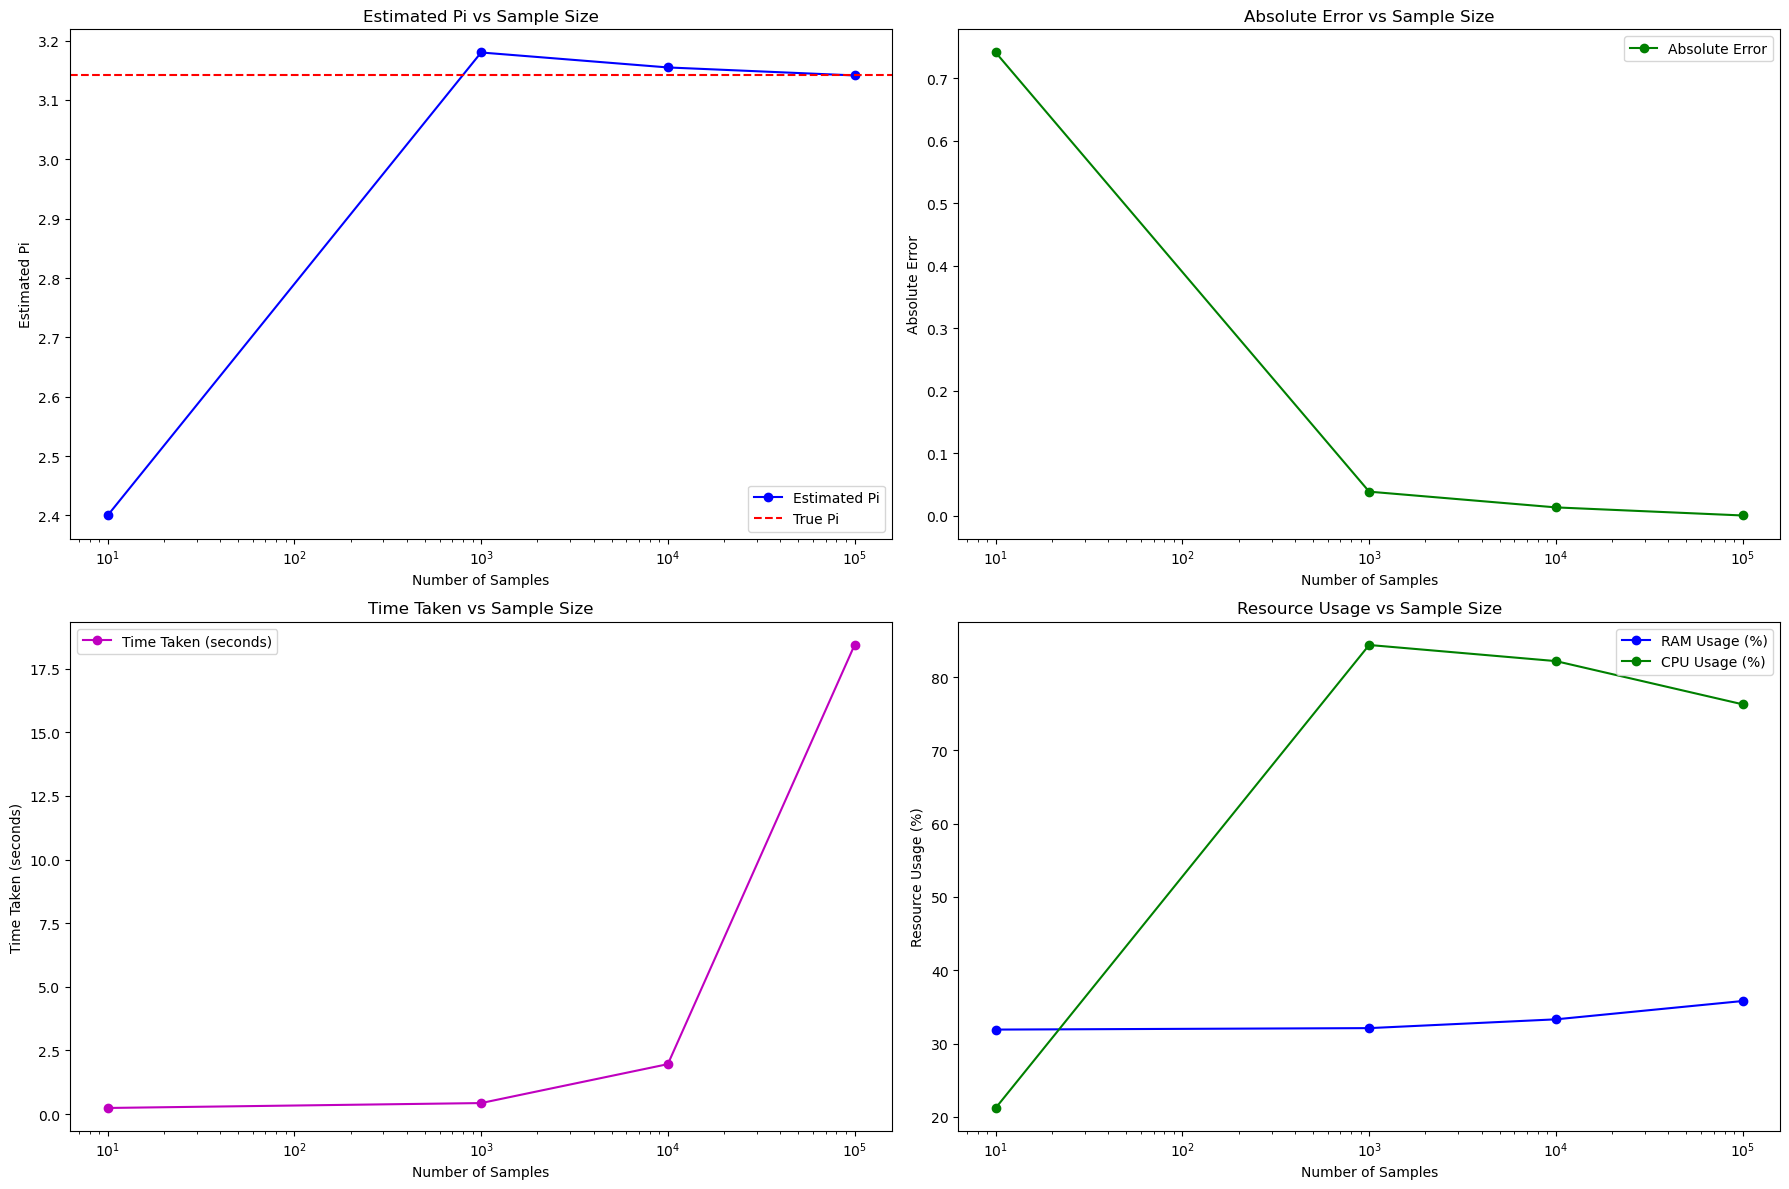

In [1]:
# pip install ray
import ray
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Initialize Ray
ray.init()

# Function to check if a point is inside the unit circle
@ray.remote
def is_point_inside_unit_circle():
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    # Submit tasks to Ray workers
    futures = [is_point_inside_unit_circle.remote() for _ in range(num_samples)]
    
    # Count the number of points inside the circle
    count_inside_circle = sum(ray.get(futures))
    
    # Estimate Pi
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    sample_sizes = [10, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========RAY========")
    # Perform Monte Carlo simulation for different sample sizes
    for num_samples in sample_sizes:
        # Execute Monte Carlo simulation using Ray
        result = monte_carlo_simulation(num_samples)
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Shutdown Ray
    ray.shutdown()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


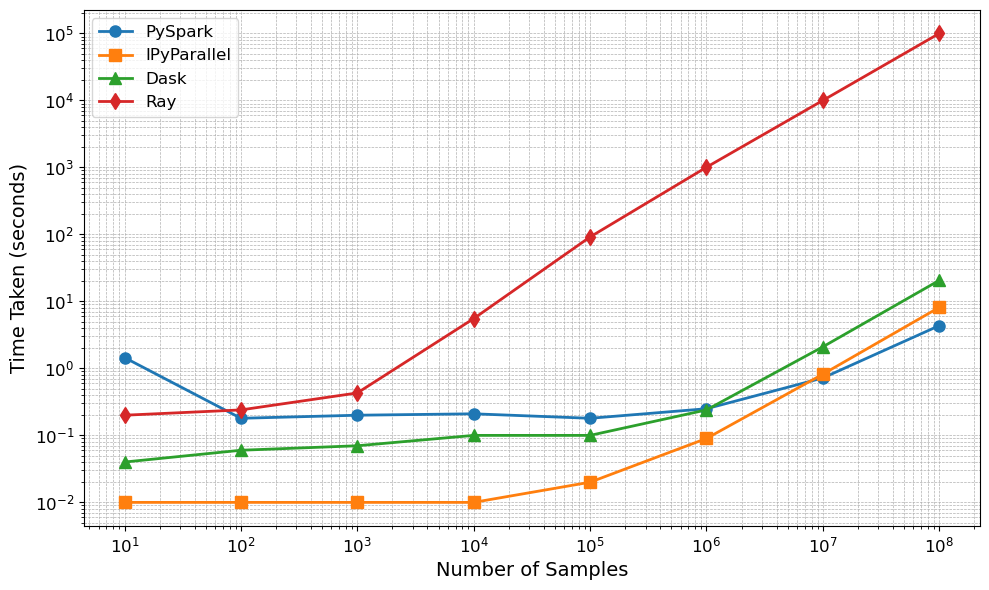

In [3]:
import matplotlib.pyplot as plt

# Data for time taken for each framework
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

# Time taken for each framework (example data)
pyspark_times = [1.45, 0.18, 0.20, 0.21, 0.18, 0.25, 0.72, 4.35]
ipyparallel_times = [0.01, 0.01, 0.01, 0.01, 0.02, 0.09, 0.82, 8.15]
dask_times = [0.04, 0.06, 0.07, 0.10, 0.10, 0.24, 2.10, 20.61]
ray_times = [0.20, 0.24, 0.43, 5.54, 91.69, 1007.24, 10007.24, 100007.24]  

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(sample_sizes[:len(pyspark_times)], pyspark_times, marker='o', label='PySpark', linewidth=2, markersize=8)
plt.plot(sample_sizes[:len(ipyparallel_times)], ipyparallel_times, marker='s', label='IPyParallel', linewidth=2, markersize=8)
plt.plot(sample_sizes[:len(dask_times)], dask_times, marker='^', label='Dask', linewidth=2, markersize=8)
plt.plot(sample_sizes[:len(ray_times)], ray_times, marker='d', label='Ray', linewidth=2, markersize=8)

plt.xscale('log')  # Use logarithmic scale for sample sizes
plt.yscale('log')  # Use logarithmic scale for time taken
plt.xlabel('Number of Samples', fontsize=14)
plt.ylabel('Time Taken (seconds)', fontsize=14)
#plt.title('Time Taken vs Sample Size for Different Frameworks', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

# Annotate specific points for clarity
#plt.annotate('Outlier', xy=(100000000, 8.15), xytext=(10**8, 10), fontsize=12,
           #  arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.savefig('Time.png', dpi=300)

plt.show()


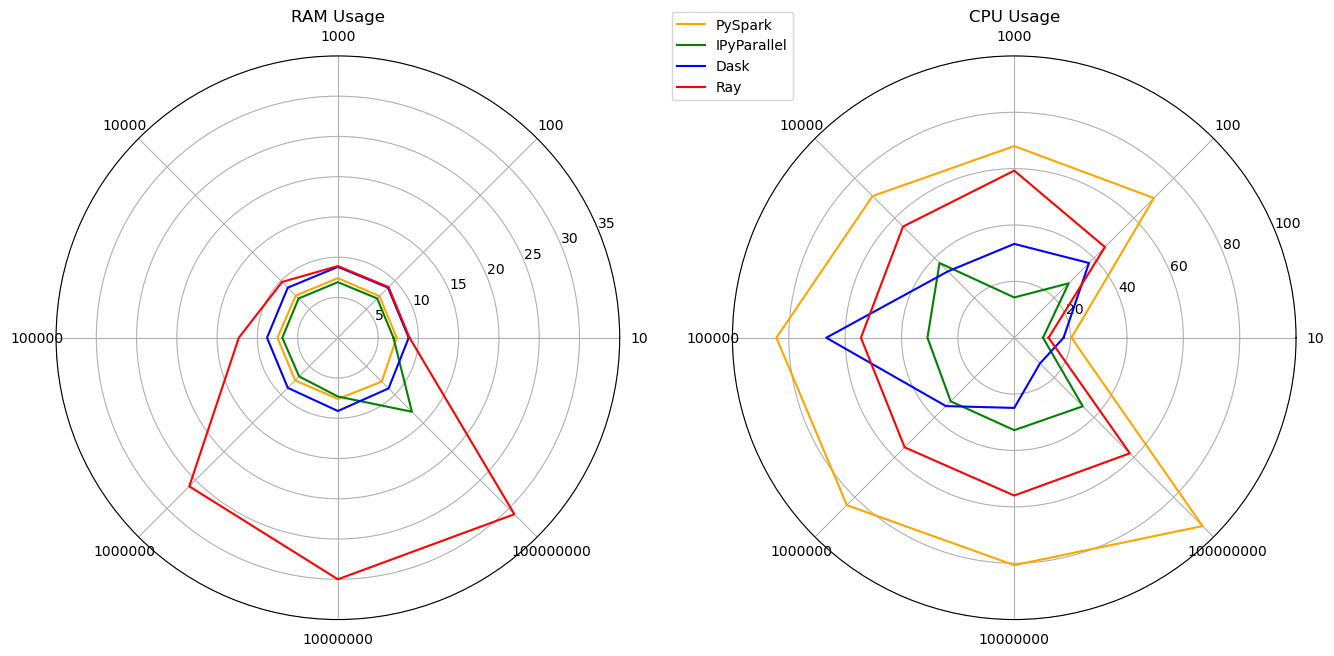

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data for RAM and CPU usage for each framework
frameworks = ['PySpark', 'IPyParallel', 'Dask', 'Ray']
samples = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

ram_data = np.array([
    [7.30, 7.30, 7.40, 7.40, 7.50, 7.50, 7.60, 7.70],    # PySpark
    [6.90, 6.90, 6.90, 6.90, 6.90, 6.80, 7.30, 13.00],   # IPyParallel
    [8.80, 8.80, 8.80, 8.80, 8.80, 8.80, 9.10, 8.90],    # Dask
    [8.90, 8.90, 8.90, 9.80, 12.30, 26.10, 30.00, 31.00] # Ray
])

cpu_data = np.array([
    [20.30, 70.10, 68.00, 71.10, 84.40, 84.00, 80.70, 94.50],    # PySpark
    [10.20, 27.30, 14.30, 37.50, 30.80, 31.90, 32.80, 34.40],    # IPyParallel
    [17.50, 37.50, 33.30, 33.30, 66.70, 34.30, 24.90, 12.90],    # Dask
    [12.20, 45.50, 59.30, 55.80, 54.40, 55.00, 56.00, 58.00]     # Ray
])

# Define colors and alphas for each framework
colors = ['orange', 'green', 'blue', 'red']

# Create subplots for RAM and CPU usage
fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))
theta = np.linspace(0, 2 * np.pi, len(samples), endpoint=False).tolist()
theta += theta[:1]

# Plot each framework as a line plot for RAM usage
for i in range(len(frameworks)):
    values = ram_data[i].tolist()
    values += values[:1]
    axes[0].plot(theta, values, color=colors[i], label=frameworks[i])
axes[0].set_title('RAM Usage')
axes[0].set_xticks(theta[:-1])
axes[0].set_xticklabels(samples)
axes[0].set_ylim(0, 35)

# Plot each framework as a line plot for CPU usage
for i in range(len(frameworks)):
    values = cpu_data[i].tolist()
    values += values[:1]
    axes[1].plot(theta, values, color=colors[i], label=frameworks[i])
axes[1].set_title('CPU Usage')
axes[1].set_xticks(theta[:-1])
axes[1].set_xticklabels(samples)
axes[1].set_ylim(0, 100)

# Add a legend and a main title
plt.legend(loc='upper center', bbox_to_anchor=(0, 1.09))
plt.savefig('CPU.png', dpi=600)
# Display the plot
plt.show()
